## Project 7: Machine Learning
Trent Rueckert - October 8th, 2024

https://github.com/trentrueckert/datafun-07-ml

### Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Part 1 - Chart a Straight Line

Create a lambda to calculate Celsius equivalents of Fahrenheit temperatures 0-100 in 10-degree increments

In [6]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

Put the data in a dataframe using pandas then display the temperatures

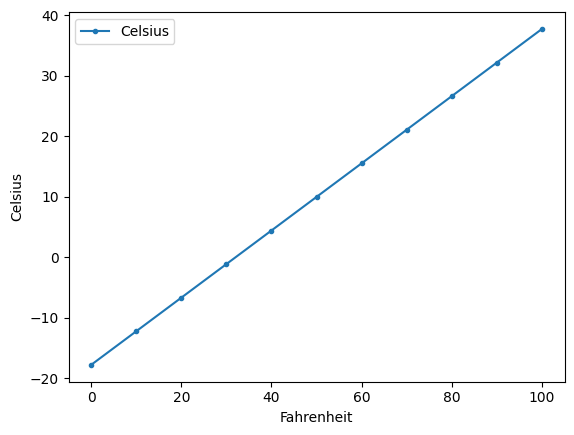

In [7]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')